<a href="https://colab.research.google.com/github/AnmolMohak/Placement_related_Projects/blob/main/Placement_project_Bigmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries **

In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Loading Dataset.**

In [519]:
# converting in Pandas data frame.
df=pd.read_csv('/content/Train.csv')

In [520]:
# Item_Identifier: eatables or non-eatable
# Item_Visibility: area occupied by mango/ display area of all product.
# outlet identifier= Unique Id for each Outlet.
# Item MRP : in USD.
# Outlet location type: Tier1(Population> 1lakh)
# Outlet type: Supermarket_1()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [521]:
# number of rows and coloumn
row,column =df.shape
print(f"Tota number of row is : {row}")
print(f"Tota number of coloumn is : {column}")

Tota number of row is : 8523
Tota number of coloumn is : 12


In [522]:
# Missing values and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [523]:
# categorical feature name
categorical_feature=df.select_dtypes(include=['object'])
print(categorical_feature.columns)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [524]:

# numrical features name
numrical_feature= df.select_dtypes(exclude=['object'])
print(numrical_feature.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [525]:
# checking Missing Values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Handlling Numerical Missing values

If skewness is -1 to +1 or Kurtosis is -2 to +2 then data can be considered as Normally distributeda and MEAN can be used to replace NaN values.

 Also check for BOX Plot

<ipython-input-526-2d55f29c148d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Item_Weight)


<Axes: xlabel='Item_Weight', ylabel='Density'>

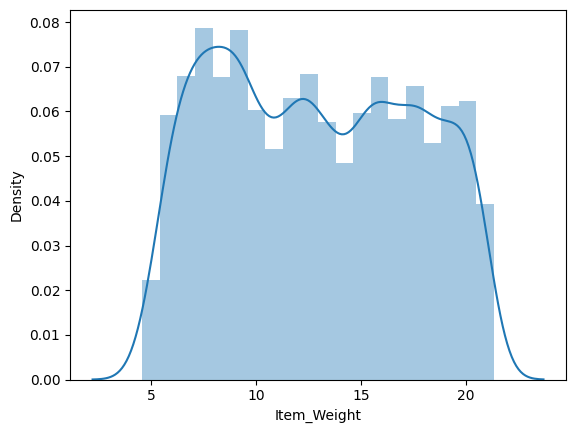

In [526]:
#plt.hist(df.Item_Weight)
# since using matplot I am not able to get a curve so  using Seaborn Lib.
sns.distplot(df.Item_Weight)

In [527]:
# to check Skewness
from scipy.stats import skew
df.skew()


<ipython-input-527-7b7b40c17a0d>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

<Axes: >

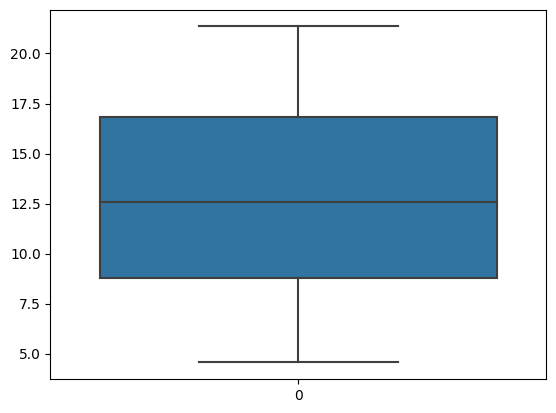

In [528]:
# to draw boxplot
sns.boxplot(df.Item_Weight)
# no outliers

In [529]:

# Item_weight : Replacing with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [530]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Handelling string type missing values

1. one way to just check mode to coloumn and replace with that value.

2. another way is to make a correlation with other feature and then fill.

In [531]:
# first way
df['Outlet_Size'].mode()[0]

'Medium'

In [532]:

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [533]:
df['Outlet_Size'].nunique()

3

#Analysing Numerical columns

<ipython-input-534-29e2cec154e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Item_Weight)


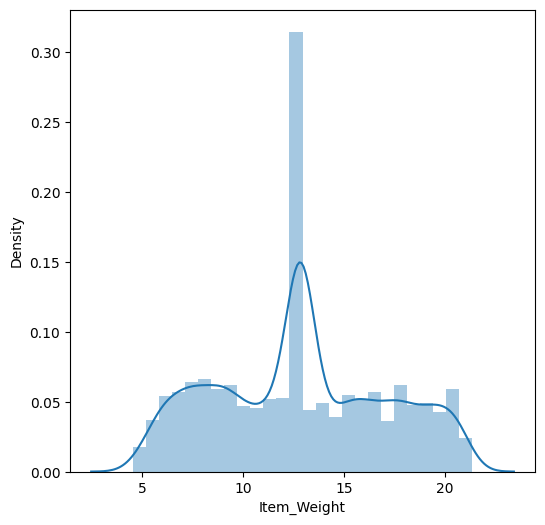

In [534]:
# Plotting for Item_Weight
plt.figure(figsize=(6,6))
sns.distplot(df.Item_Weight)
plt.show()

<ipython-input-535-c63ab1ba7436>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Item_Visibility)


<Axes: xlabel='Item_Visibility', ylabel='Density'>

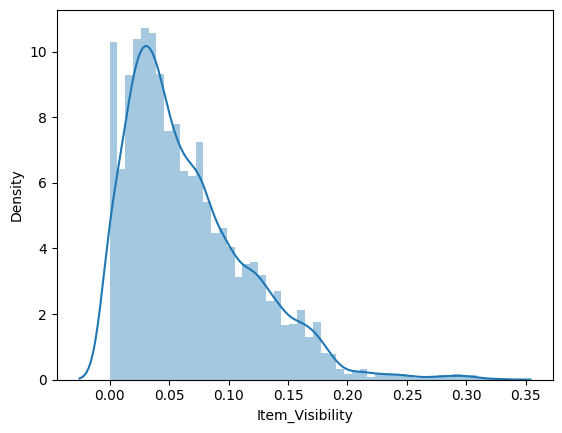

In [535]:
#Plotting of Item_Visibility
sns.distplot(df.Item_Visibility)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

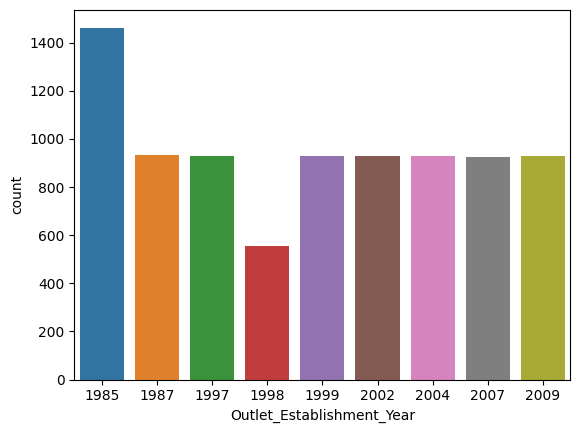

In [536]:
sns.countplot(x='Outlet_Establishment_Year', data=df)

# Analysing Ccategorical Columns.

In [537]:
df.select_dtypes(include ='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

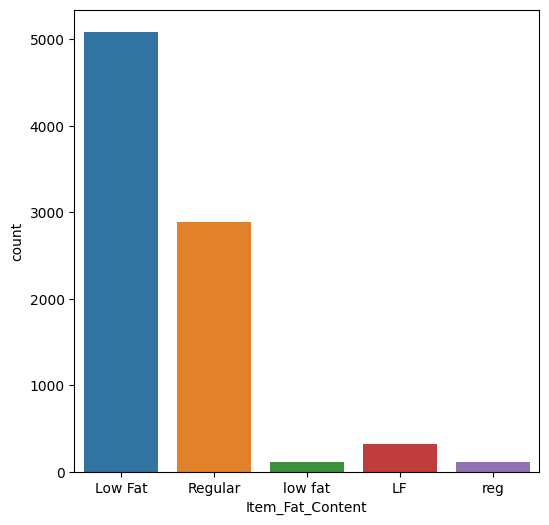

In [538]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

In [539]:
#Replacing LF,low fat and reg to Low Fat and Regular
df['Item_Fat_Content'].replace(('LF','low fat'),'Low Fat',inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [541]:
df['Item_Fat_Content'].nunique()

3

In [542]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

#Using label Encoder

In [543]:
df['Outlet_Size'].nunique()

#since unique values are too much and also Item Identifier might now have effect on sales so ignore this coloumn

3

In [544]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [545]:
df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [546]:
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])

In [547]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [548]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#Splitting data in test and train

In [562]:
from sklearn.model_selection import train_test_split



In [563]:
y=df['Item_Outlet_Sales']
x=df.drop(columns=[('Item_Outlet_Sales'),('Item_Identifier')],axis=1)

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [558]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#Trainning ML model (XGBooster)

In [559]:
from xgboost import XGBRegressor
regressor=XGBRegressor()
regressor.fit(x_train,y_train)
y_train_predicted=regressor.predict(x_train)
from sklearn import metrics

Rsquare_value_train=metrics.r2_score(y_train,y_train_predicted)
print(Rsquare_value_train)

# Rsquare value by this procedure is 0.85

# calculating Adjusted R2 value also

def adj_r2(y_true,y_predicted):
    r2 = metrics.r2_score(y_true,y_predicted)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2_value_train=adj_r2(y_train,y_train_predicted)
print(adj_r2_value_train)

y_test_predicted=regressor.predict(x_test)

Rsquare_value_test=metrics.r2_score(y_test,y_test_predicted)
print(Rsquare_value_test)

adj_r2_value_test=adj_r2(y_test,y_test_predicted)
print(adj_r2_value_test)

mae = metrics.mean_absolute_error(y_test, y_test_predicted)
mse = metrics.mean_squared_error(y_test, y_test_predicted)
rmse = metrics.mean_squared_error(y_test, y_test_predicted, squared=False)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

0.8581816849624241
0.858015075099833
0.530033974460896
0.529481852720366
Mean Absolute Error: 843.6584590435655
Mean Squared Error: 1450820.232219511
Root Mean Squared Error: 1204.499992619141


#Trainning model: Linear Regression

In [567]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)
y_train_predicted=linear.predict(x_train)

y_test_predicted=linear.predict(x_test)
adj_r2_value_train=adj_r2(y_train,y_train_predicted)
adj_r2_value_test=adj_r2(y_test,y_test_predicted)
print(metrics.r2_score(y_train,y_train_predicted))
print(adj_r2_value_train)
print(metrics.r2_score(y_test,y_test_predicted))
print(adj_r2_value_test)
mae = metrics.mean_absolute_error(y_test, y_test_predicted)
mse = metrics.mean_squared_error(y_test, y_test_predicted)
rmse = metrics.mean_squared_error(y_test, y_test_predicted, squared=False)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

0.5140562889974002
0.513485396479775
0.4949750058252047
0.4943816963865595
Mean Absolute Error: 938.3376550022664
Mean Squared Error: 1559049.8876697386
Root Mean Squared Error: 1248.6191924160619


#SVM

In [565]:
from sklearn.svm import SVR
SVR=SVR()

In [566]:
SVR.fit(x_train,y_train)
y_train_predicted=SVR.predict(x_train)
y_train_predicted=SVR.predict(x_train)
y_test_predicted=SVR.predict(x_test)
adj_r2_value_train=adj_r2(y_train,y_train_predicted)
adj_r2_value_test=adj_r2(y_test,y_test_predicted)
print(metrics.r2_score(y_train,y_train_predicted))
print(adj_r2_value_train)
print(metrics.r2_score(y_test,y_test_predicted))
print(adj_r2_value_test)
mae = metrics.mean_absolute_error(y_test, y_test_predicted)
mse = metrics.mean_squared_error(y_test, y_test_predicted)
rmse = metrics.mean_squared_error(y_test, y_test_predicted, squared=False)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

-0.04462109175464679
-0.045848325180110505
-0.05977170425173761
-0.06101673679902597
Mean Absolute Error: 1338.965858824088
Mean Squared Error: 3271594.42706192
Root Mean Squared Error: 1808.754938365593


#DECISION TREE

In [568]:
from sklearn.tree import DecisionTreeRegressor
decison=DecisionTreeRegressor()

In [569]:
decison.fit(x_train,y_train)
y_train_predicted=decison.predict(x_train)
y_test_predicted=decison.predict(x_test)
adj_r2_value_train=adj_r2(y_train,y_train_predicted)
adj_r2_value_test=adj_r2(y_test,y_test_predicted)
print(metrics.r2_score(y_train,y_train_predicted))
print(adj_r2_value_train)
print(metrics.r2_score(y_test,y_test_predicted))
print(adj_r2_value_test)
mae = metrics.mean_absolute_error(y_test, y_test_predicted)
mse = metrics.mean_squared_error(y_test, y_test_predicted)
rmse = metrics.mean_squared_error(y_test, y_test_predicted, squared=False)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

1.0
1.0
0.2257010816292987
0.22479142594512258
Mean Absolute Error: 1099.7297806451613
Mean Squared Error: 2390318.6092425864
Root Mean Squared Error: 1546.0655255333088


# random Forest


In [570]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()

In [571]:
random.fit(x_train,y_train)
y_train_predicted=random.predict(x_train)
y_test_predicted=random.predict(x_test)
adj_r2_value_train=adj_r2(y_train,y_train_predicted)
adj_r2_value_test=adj_r2(y_test,y_test_predicted)
print(metrics.r2_score(y_train,y_train_predicted))
print(adj_r2_value_train)
print(metrics.r2_score(y_test,y_test_predicted))
print(adj_r2_value_test)
mae = metrics.mean_absolute_error(y_test, y_test_predicted)
mse = metrics.mean_squared_error(y_test, y_test_predicted)
rmse = metrics.mean_squared_error(y_test, y_test_predicted, squared=False)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

0.9389591954494024
0.9388874839778909
0.5505844873012333
0.5500565085504124
Mean Absolute Error: 824.0814813818182
Mean Squared Error: 1387379.2637430192
Root Mean Squared Error: 1177.8706481371455


#ElascticNet

In [572]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()


In [573]:
elastic.fit(x_train,y_train)
y_train_predicted=elastic.predict(x_train)
y_test_predicted=elastic.predict(x_test)
adj_r2_value_train=adj_r2(y_train,y_train_predicted)
adj_r2_value_test=adj_r2(y_test,y_test_predicted)
print(metrics.r2_score(y_train,y_train_predicted))
print(adj_r2_value_train)
print(metrics.r2_score(y_test,y_test_predicted))
print(adj_r2_value_test)
mae = metrics.mean_absolute_error(y_test, y_test_predicted)
mse = metrics.mean_squared_error(y_test, y_test_predicted)
rmse = metrics.mean_squared_error(y_test, y_test_predicted, squared=False)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

0.48293003436295767
0.4823225743469367
0.4588064626872679
0.458170662009034
Mean Absolute Error: 961.8936457728171
Mean Squared Error: 1670704.8825052253
Root Mean Squared Error: 1292.5574967889147
